# Naive Bayes Classifier

In [29]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns

In [30]:
data_twt = pd.read_csv("dataset/dataset-preprocessing.csv")

In [31]:
# melakukan konversi sentimen ke label 0 untuk negatif dan 1 untuk positif
def convert_sentimen(sentimen):
    if sentimen == 1:
        return "positif"
    if sentimen == -1:
        return "negatif"
    else:
        return "netral"

data_twt['sentimen'] = data_twt['label_sentimen'].apply(convert_sentimen)
data_twt.shape

(1000, 3)

In [32]:
data_twt

,tweet_bersih,label_sentimen,sentimen
0,astaga sekolah offline,-1,negatif
1,sekolah offline bosan sekolah offline saya bosan,-1,negatif
2,sekolah offline semangat jojooo,1,positif
3,unty hai yuk sekolah offline kayak semangat aj...,1,positif
4,sch hai teman teman sender ptm kali sekolah al...,-1,negatif
...,...,...,...
995,tuhan besok sekolah agama offline presentasi,-1,negatif
996,zona hijau moga dom sekolah offline,1,positif
997,san pulang sekolah ajar offline,0,netral
998,malas banget sekolah offline,-1,negatif


## Persebaran Data Sentimen

In [33]:
data_twt['sentimen'].value_counts()

positif    396
negatif    317
netral     287
Name: sentimen, dtype: int64

In [34]:
tweet_bar_df = data_twt['sentimen'].value_counts()
print(f'Sentimen: {tweet_bar_df.index}')
print(f'Nilai: {tweet_bar_df.values}')
print(f'Total Data: {tweet_bar_df.sum()}')

Sentimen: Index(['positif', 'negatif', 'netral'], dtype='object')
Nilai: [396 317 287]
Total Data: 1000


In [35]:
data_twt['tweet_bersih'].head(20)

0                                astaga sekolah offline
1      sekolah offline bosan sekolah offline saya bosan
2                       sekolah offline semangat jojooo
3     unty hai yuk sekolah offline kayak semangat aj...
4     sch hai teman teman sender ptm kali sekolah al...
5     adik sekolah offline kakak tahan meja ajar sua...
6                                sekolah offline daring
7                           sekolah offline papay guyss
8                           pagi sekolah offline daring
9     sch wtp sender sekolah offline semangat daring...
10            offline sekolah orang heboh rumah sekolah
11    saya sekolah offline bawa malas waka mentwit i...
12                                      sekolah offline
13                            sekolah offline tidur jam
14        adik sekolah offline sarapannyaa jam seginiii
15                      pagi moots cung sekolah offline
16                                      sekolah offline
17                           sekolah daring offl

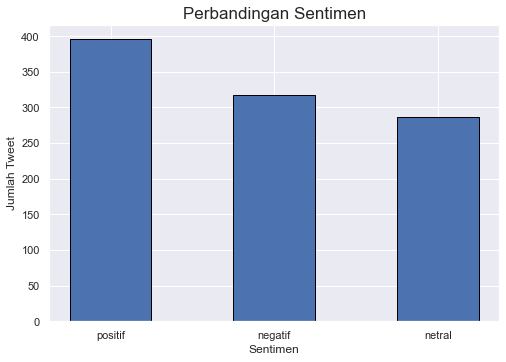

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(7,5))

# hitung frekuensi dari masing-masing nilai pada kolom 'Produk'
class_freq = data_twt['sentimen'].value_counts()
# membuat bar plot dengan method `plt.bar()` dari matplotlib
plt.bar(x=class_freq.index, height=class_freq.values, align='center',  edgecolor = 'black', width= 0.5)
plt.title('Perbandingan Sentimen', size=17)
plt.tight_layout()
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')

plt.savefig('assets/grafik batang.png', dpi=200)
plt.show()

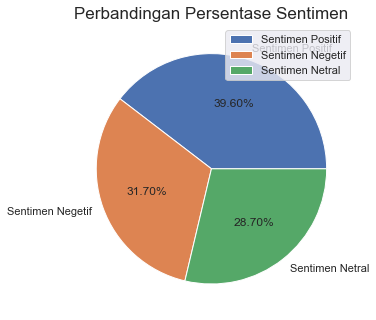

In [37]:
sentimen = ['Sentimen Positif', 'Sentimen Negetif', 'Sentimen Netral'] 
slices = [(data_twt['sentimen'] == "positif").sum(), (data_twt['sentimen'] == "negatif").sum(), (data_twt['sentimen'] == "netral").sum()] 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(slices,labels=sentimen,autopct='%1.2f%%')
fig = plt.gcf()
fig.set_size_inches(4,4) 
plt.title('Perbandingan Persentase Sentimen', size=17)
plt.legend()
plt.savefig('assets/grafik pie.png', bbox_inches='tight', dpi=200)
plt.show()

## Word Cloud

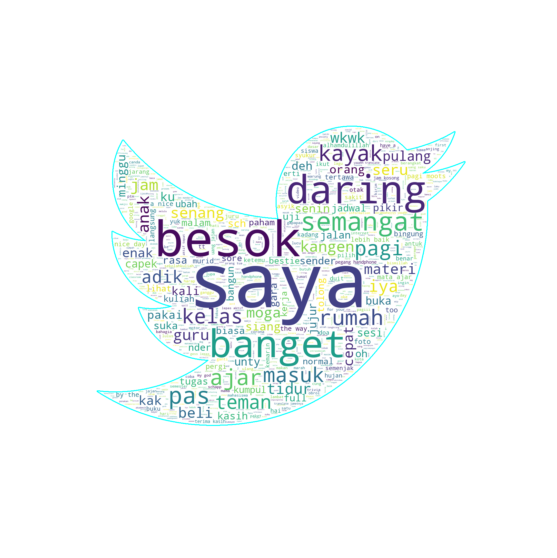

In [38]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

#Word Cloud menampilkan kata yang sering muncul di kelas sentimen positif

twitter_mask = np.array(Image.open("assets/twitter-logo.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_twitter_mask = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]), np.int32)
for i in range(len(twitter_mask)):
    transformed_twitter_mask[i] = list(map(transform_format, twitter_mask[i]))

tweet_positif = data_twt[data_twt['sentimen'] == 'positif']
all_text_positif = ' '.join(word for word in tweet_positif['tweet_bersih'])
wordcloud = WordCloud(width=1000, height=1000, background_color='White',
                      mask=transformed_twitter_mask, max_words=1000,
                      contour_width=3, contour_color='aqua', stopwords=['sekolah', 'offline']).generate(all_text_positif)
wordcloud.to_file('assets/wc-positif.png')

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

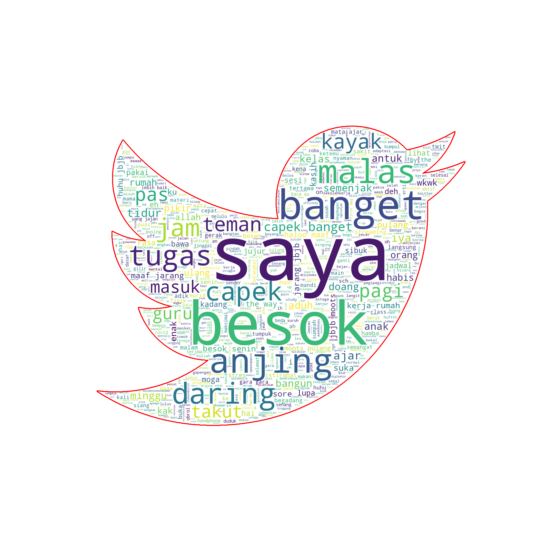

In [39]:
#Word Cloud menampilkan kata yang sering muncul di kelas sentimen negatif

tweet_negatif = data_twt[data_twt['sentimen'] == 'negatif']
all_text_negatif = ' '.join(word for word in tweet_negatif['tweet_bersih'])
wordcloud = WordCloud(width=1000, height=1000, background_color='White',
                      mask=transformed_twitter_mask, max_words=1000,
                      contour_width=3, contour_color='red', stopwords=['sekolah', 'offline']).generate(all_text_negatif)
wordcloud.to_file('assets/wc-negatif.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

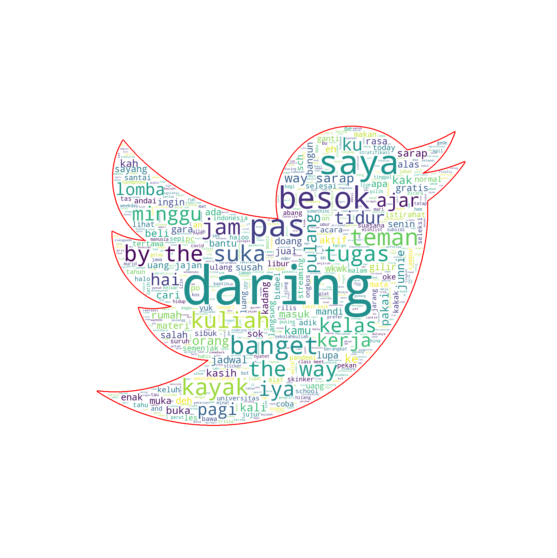

In [40]:
#Word Cloud menampilkan kata yang sering muncul di kelas sentimen netral

tweet_netral = data_twt[data_twt['sentimen'] == 'netral']
all_text_netral = ' '.join(word for word in tweet_netral['tweet_bersih'])
wordcloud = WordCloud(width=1000, height=1000, background_color='White',
                      mask=transformed_twitter_mask, max_words=1000,
                      contour_width=3, contour_color='red', stopwords=['sekolah', 'offline']).generate(all_text_netral)
wordcloud.to_file('assets/wc-netral.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

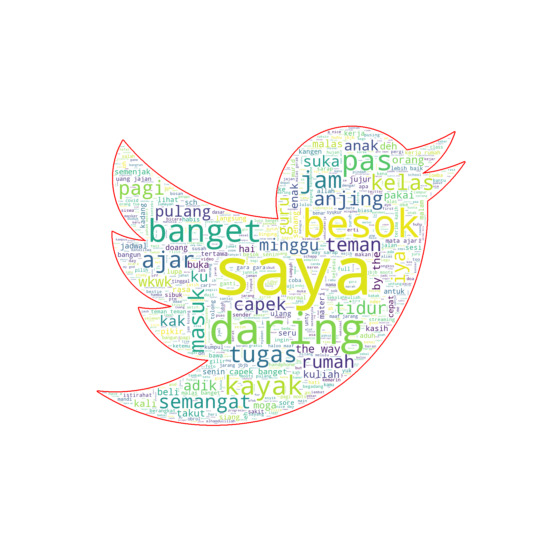

In [41]:
#Word Cloud menampilkan kata yang sering muncul di semua kelas sentimen

all_text = ' '.join(word for word in data_twt['tweet_bersih'])
wordcloud = WordCloud(width=1000, height=1000, background_color='White',
                      mask=transformed_twitter_mask, max_words=1000,
                      contour_width=3, contour_color='red', stopwords=['sekolah', 'offline']).generate(all_text)
wordcloud.to_file('assets/wc-all_text.png')

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [42]:
from collections import Counter

#menghitung jumlah kata yang muncul pada kelas positif
Counter(" ".join(tweet_positif.tweet_bersih).split()).most_common(10)

[('sekolah', 426),
 ('offline', 406),
 ('saya', 86),
 ('besok', 71),
 ('daring', 42),
 ('banget', 40),
 ('semangat', 38),
 ('ajar', 32),
 ('pas', 30),
 ('pagi', 28)]

In [43]:
#menghitung jumlah kata yang muncul pada kelas negatif
Counter(" ".join(tweet_negatif.tweet_bersih).split()).most_common(10)

[('sekolah', 360),
 ('offline', 337),
 ('saya', 107),
 ('banget', 75),
 ('besok', 69),
 ('capek', 45),
 ('anjing', 39),
 ('malas', 36),
 ('daring', 33),
 ('tugas', 31)]

In [44]:
#menghitung jumlah kata yang muncul pada kelas netral
Counter(" ".join(tweet_netral.tweet_bersih).split()).most_common(10)

[('sekolah', 314),
 ('offline', 306),
 ('daring', 125),
 ('saya', 33),
 ('pas', 28),
 ('besok', 27),
 ('banget', 17),
 ('teman', 15),
 ('kayak', 14),
 ('the', 14)]

In [45]:
#menghitung jumlah kata yang muncul pada semua kelas sentimen
Counter(" ".join(data_twt.tweet_bersih).split()).most_common(20)

[('sekolah', 1100),
 ('offline', 1049),
 ('saya', 226),
 ('daring', 200),
 ('besok', 167),
 ('banget', 132),
 ('pas', 79),
 ('kayak', 66),
 ('ajar', 61),
 ('teman', 59),
 ('pagi', 57),
 ('jam', 57),
 ('capek', 54),
 ('tugas', 50),
 ('rumah', 46),
 ('masuk', 45),
 ('kelas', 44),
 ('semangat', 43),
 ('anjing', 43),
 ('iya', 40)]

## Pembobotan TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
final_vectorized_data = tf_idf_vectorizer.fit_transform(data_twt['tweet_bersih'])

print('Total {} data, dengan total {} kata'. format(final_vectorized_data.shape[0], final_vectorized_data.shape[1])) 
print(final_vectorized_data)

Total 1000 data, dengan total 6490 kata
  (0, 5215)	0.12049098967472259
  (0, 412)	0.7145856804144907
  (0, 3882)	0.09952924600021824
  (0, 5144)	0.10042819318103574
  (0, 410)	0.674431118765131
  (1, 4966)	0.38326548734358534
  (1, 4150)	0.25589845861457244
  (1, 889)	0.36172873106450193
  (1, 3932)	0.38326548734358534
  (1, 4950)	0.1495222802640463
  (1, 885)	0.6691912540624685
  (1, 5215)	0.129249827260482
  (1, 3882)	0.10676431397586035
  (1, 5144)	0.10772860822019033
  (2, 5328)	0.5854591051331579
  (2, 4162)	0.4219741451777046
  (2, 2423)	0.5854591051331579
  (2, 5321)	0.33652379354355016
  (2, 5215)	0.09871810886366199
  (2, 3882)	0.08154417992824375
  (2, 5144)	0.08228068616740895
  (3, 4569)	0.2542156440042236
  (3, 5226)	0.28123134752680823
  (3, 153)	0.2542156440042236
  (3, 5322)	0.2542156440042236
  :	:
  (998, 3288)	0.6011224246377549
  (998, 496)	0.3395609352353468
  (998, 3287)	0.46880638400156277
  (998, 5215)	0.13271400636652683
  (998, 3882)	0.10962583196459243
  (99

In [47]:
# # You can use the below syntax to see the vocabulary that it has learned from the corpus
# print(tf_idf_vectorizer.vocabulary_)

In [48]:
data_tfidf = pd.DataFrame({'kata':tf_idf_vectorizer.vocabulary_})
data_tfidf

,kata
aaa,0
aaa akun,1
aaa hpbd,2
aaa kangen,3
aaaa,4
...,...
zona merah,6485
zoom,6486
zoom angkat,6487
zoom class,6488


## Pembobotan Count Vectorizer

In [13]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
# final_vectorized_data = count_vectorizer.fit_transform(data_twt['tweet_bersih'])  
# final_vectorized_data
# print('Total {} data, dengan total {} kata'. format(final_vectorized_data.shape[0], final_vectorized_data.shape[1])) 
# print(final_vectorized_data) 

## Split Data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, data_twt['sentimen'],
                                                    test_size=0.1, random_state=9)

In [50]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (900, 6490)
X_test_shape :  (100, 6490)
y_train_shape :  (900,)
y_test_shape :  (100,)


In [51]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, data_twt['sentimen'],
#                                                     test_size=0.2, random_state=7)

In [52]:
# from sklearn.model_selection import train_test_split
# x = data_twt['tweet_bersih']
# y = data_twt['sentimen']
# X_latih, X_uji, y_latih, y_uji = train_test_split(x, y,
#                                                     test_size=0.1, random_state=9)

## Klasifikasi Menggunakan Multinominal Naive Bayes 

In [53]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predict = model_naive.predict(X_test)
print(predict)

# simpan naive bayes model
with open('model/model_analisis.pkl', 'wb') as r:
    pickle.dump(model_naive, r)

['positif' 'positif' 'positif' 'netral' 'netral' 'negatif' 'positif'
 'negatif' 'positif' 'negatif' 'netral' 'positif' 'positif' 'negatif'
 'positif' 'netral' 'positif' 'positif' 'positif' 'netral' 'netral'
 'positif' 'negatif' 'positif' 'netral' 'positif' 'positif' 'positif'
 'positif' 'positif' 'netral' 'positif' 'positif' 'netral' 'netral'
 'netral' 'negatif' 'positif' 'netral' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'negatif'
 'positif' 'netral' 'positif' 'positif' 'netral' 'positif' 'negatif'
 'positif' 'netral' 'positif' 'positif' 'netral' 'positif' 'positif'
 'negatif' 'negatif' 'netral' 'negatif' 'positif' 'netral' 'positif'
 'netral' 'netral' 'negatif' 'positif' 'negatif' 'positif' 'positif'
 'netral' 'netral' 'negatif' 'negatif' 'netral' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'netral' 'negatif'
 'positif' 'netral' 'negatif' 'positif' 'netral' 'positif' 'positif'
 'positif' 'negatif']


## Menyimpan Model Yang Telah Dibentuk

In [54]:
#simpan tfidf model
filename_tfidf = 'model/tfidf.pkl'
pickle.dump(tf_idf_vectorizer, open(filename_tfidf, 'wb'))

In [55]:
# simpan naive bayes model
with open('model/model_analisis.pkl', 'wb') as r:
    pickle.dump(model_naive, r)

In [56]:
# #simpan count vector model
# filename_countv = 'model/count_vector.pkl'
# pickle.dump(count_vectorizer, open(filename_countv, 'wb'))

## Menguji Model Dengan Confusion Matrix

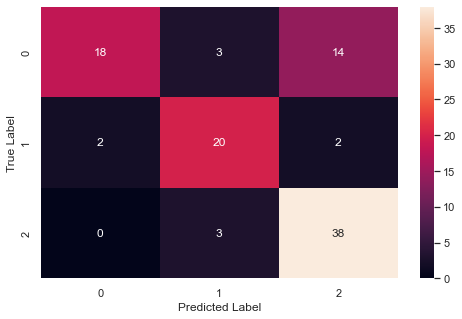

In [57]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict))

Hasil akurasi model : 
0.76


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

     negatif       0.90      0.51      0.65        35
      netral       0.77      0.83      0.80        24
     positif       0.70      0.93      0.80        41

    accuracy                           0.76       100
   macro avg       0.79      0.76      0.75       100
weighted avg       0.79      0.76      0.75       100



In [60]:
# data_test = pd.DataFrame({'tweet':X_uji, 'sentimen':y_uji, 'prediksi':predict})
# data_test

In [29]:
# filename = 'hasil/hasil-datatest.csv'
# data_test.to_excel(filename, index=False)

In [60]:
# data_test.to_excel ('hasil\hasil-test.xlsx', index = False, header=True)